In [1]:
#Import Library
import json
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt 
import spacy 
import math
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import scipy

In [2]:
business_clean4 = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean4.pkl")
business_chara2 = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_chara2.pkl")
                                

In [8]:
#business_chara2
business_clean4

,business_id,category_token,address,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state,country,category_parent
0,QXAEGFB4oINsVuTFxEYKFQ,"[Specialty Food, Restaurants, Dim Sum, Importe...",30 Eglinton Avenue W,Mississauga,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON,Canada,chinese
1,gnKjwL_1w79qoiV3IC_xQQ,"[Sushi Bars, Restaurants, Japanese]","10110 Johnston Rd, Ste 15",Charlotte,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC,U.S,japanese
2,1Dfx3zM-rW4n-31KeC8sJg,"[Restaurants, Breakfast & Brunch, Mexican, Tac...",2450 E Indian School Rd,Phoenix,1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ,U.S,mexican
3,fweCYi8FmbJXHCqLnwuk8w,"[Italian, Restaurants, Pizza, Chicken Wings]",5981 Andrews Rd,Mentor-on-the-Lake,1,41.708520,-81.359556,Marco's Pizza,44060,16,4.0,OH,U.S,pizza
4,PZ-LZzSlhSe9utkQYU8pFg,"[Restaurants, Italian]","1775 E Tropicana Ave, Ste 29",Las Vegas,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV,U.S,italian
5,1RHY4K3BD22FK7Cfftn8Mg,"[Sandwiches, Salad, Restaurants, Burgers, Comf...","Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,1,40.496177,-80.246011,Marathon Diner,15231,35,4.0,PA,U.S,sandwiches
6,tstimHoMcYbkSC4eBA1wEg,"[Mexican, Restaurants, Patisserie/Cake Shop, F...",6055 E Lake Mead Blvd,Las Vegas,1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV,U.S,nightlife
7,NDuUMJfrWk52RA-H-OtrpA,"[Juice Bars & Smoothies, Food, Restaurants, Fa...",1170 Queen Street W,Toronto,1,43.642889,-79.425429,Bolt Fresh Bar,M6J 1J5,57,3.0,ON,Canada,fast food
8,SP_YXIEwkFPPl_9anCYmpQ,"[Restaurants, Nightlife, Breakfast & Brunch, V...",1051 Bloor Street W,Toronto,0,43.660494,-79.432099,The Steady Cafe & Bar,M6H 1M4,29,3.5,ON,Canada,nightlife
9,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches, Italian, American (Traditional), ...",6401 Morrison Blvd,Charlotte,0,35.156338,-80.831878,Manzetti's Tavern,28211,16,3.5,NC,U.S,sandwiches


In [11]:
#Tackel with tfidf Vectorizer:
def dummy_fun(doc):
    return doc

In [12]:
# Try to get TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_0 = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None) 

train_sample_tfidf_0 = tfidf_0.fit_transform(business_chara2['category_token']) 

In [62]:
def find_optimal_clusters_p(data, max_k):
    iters = range(2, max_k+1, 2)
    
    perplexity = []
    for k in iters:
        lda_model = LatentDirichletAllocation(n_topics=k, max_iter=5, learning_method='online',verbose=True)
        
        category_lda = lda_model.fit_transform(data)
        
        perplexity.append(lda_model.perplexity(data))
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, perplexity, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('Perplexity')
    ax.set_title('perplexity by Cluster Center Plot')


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 5 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 7 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 9 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 11 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 13 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 15 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 17 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 19 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 21 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 23 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 25 clusters


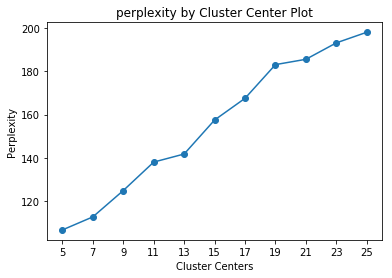

In [61]:
find_optimal_clusters_p(train_sample_tfidf_0, 25)


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 2 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 4 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 6 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 8 clusters


C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Fit 10 clusters


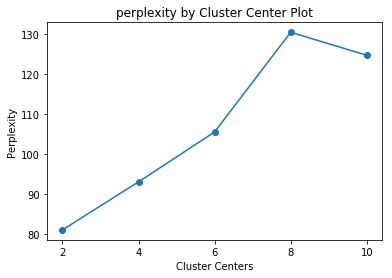

In [63]:
find_optimal_clusters_p(train_sample_tfidf_0, 10)

In [13]:
lda_category = LatentDirichletAllocation(n_topics=10, max_iter=5, learning_method='online',verbose=True)
category_lda = lda_category.fit_transform(train_sample_tfidf_0 )

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [14]:
lda_category.perplexity(train_sample_tfidf_0)

131.20093636503532

In [15]:
pyLDAvis.enable_notebook()

dash0 = pyLDAvis.sklearn.prepare(lda_category, train_sample_tfidf_0, tfidf_0, mds='tsne')
dash0

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1     -169.896683  114.494209       1        1  12.905353
9      115.988304  100.538521       2        1  11.954265
0      238.328506   -0.122430       3        1  10.549757
6      -12.732490  192.900482       4        1  10.364940
5       45.781464 -250.531662       5        1   9.400904
2      -82.837456 -158.073212       6        1   9.259388
4      -40.967773   15.442315       7        1   9.077861
7     -205.246109  -57.536285       8        1   9.047149
3       74.086319  -73.015579       9        1   9.032125
8      202.947144 -172.156494      10        1   8.408260, topic_info=    Category         Freq                       Term        Total  loglift  \
74   Default  3057.000000                    Chinese  3057.000000  30.0000   
52   Default  3034.000000                    Burgers  3034.000000  29.0000   
216  Default  2892.000000                    Mexican  2892.000000  28.0000   
257  Default  4237.000000                      Pizza  4237.000000  27.0000   
230  Default  2464.000000                  Nightlife  2464.000000  26.0000   
189  Default  2766.000000                    Italian  2766.000000  25.0000   
25   Default  2414.000000                       Bars  2414.000000  24.0000   
129  Default  3999.000000                  Fast Food  3999.000000  23.0000   
280  Default  3520.000000                 Sandwiches  3520.000000  22.0000   
191  Default  1664.000000                   Japanese  1664.000000  21.0000   
314  Default  1451.000000                 Sushi Bars  1451.000000  20.0000   
45   Default  2260.000000         Breakfast & Brunch  2260.000000  19.0000   
73   Default  1586.000000              Chicken Wings  1586.000000  18.0000   
56   Default  1485.000000                      Cafes  1485.000000  17.0000   
279  Default  1292.000000                      Salad  1292.000000  16.0000   
7    Default  2215.000000             American (New)  2215.000000  15.0000   
101  Default  1174.000000                      Delis  1174.000000  14.0000   
82   Default  1645.000000               Coffee & Tea  1645.000000  13.0000   
180  Default  1046.000000                     Indian  1046.000000  12.0000   
8    Default  3023.000000     American (Traditional)  3023.000000  11.0000   
348  Default   974.000000                 Vietnamese   974.000000  10.0000   
329  Default  1027.000000                       Thai  1027.000000   9.0000   
21   Default   960.000000                   Bakeries   960.000000   8.0000   
283  Default  1270.000000                    Seafood  1270.000000   7.0000   
24   Default  1009.000000                   Barbeque  1009.000000   6.0000   
68   Default   860.000000                   Caterers   860.000000   5.0000   
61   Default   951.000000             Canadian (New)   951.000000   4.0000   
126  Default   969.000000  Event Planning & Services   969.000000   3.0000   
17   Default  1077.000000               Asian Fusion  1077.000000   2.0000   
215  Default   889.000000              Mediterranean   889.000000   1.0000   
..       ...          ...                        ...          ...      ...   
157  Topic10   368.759298                      Halal   369.658716   2.4735   
247  Topic10   146.062548            Persian/Iranian   146.961951   2.4698   
222  Topic10   144.243990            Modern European   145.143419   2.4697   
3    Topic10    95.706997                     Afghan    96.606388   2.4666   
39   Topic10    94.434237                    Bistros    95.333650   2.4665   
201  Topic10    89.508277                     Kosher    90.407687   2.4660   
1    Topic10    86.664564                Active Life    87.563976   2.4656   
43   Topic10    86.240756                 Brasseries    87.140177   2.4656   
169  Topic10    78.529598                Hookah Bars    79.429023   2.4646   
111  Topic10    62.624512        Do-It-Yourself Food    63.5239

In [70]:
lda_category_2 = LatentDirichletAllocation(n_topics=6, max_iter=5, learning_method='online',verbose=True)
category_lda_2 = lda_category_2.fit_transform(train_sample_tfidf_0 )

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [71]:
pyLDAvis.enable_notebook()

dash2 = pyLDAvis.sklearn.prepare(lda_category_2, train_sample_tfidf_0, tfidf_0, mds='tsne')
dash2

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
3     -13.568290 -81.761063       1        1  22.629669
4      74.826469 -57.735580       2        1  18.638792
0      14.095022  -8.915850       3        1  16.079833
2     -63.733292  -5.116810       4        1  15.561232
5      79.292419  33.757065       5        1  14.333272
1      -6.342191  66.277283       6        1  12.757202, topic_info=    Category         Freq                    Term        Total  loglift  \
257  Default  4056.000000                   Pizza  4056.000000  30.0000   
216  Default  3124.000000                 Mexican  3124.000000  29.0000   
74   Default  2986.000000                 Chinese  2986.000000  28.0000   
189  Default  2775.000000                 Italian  2775.000000  27.0000   
136  Default  4216.000000                    Food  4216.000000  26.0000   
129  Default  3702.000000               Fast Food  3702.000000  25.0000   
280  Default  3271.000000              Sandwiches  3271.000000  24.0000   
191  Default  1938.000000                Japanese  1938.000000  23.0000   
52   Default  2743.000000                 Burgers  2743.000000  22.0000   
230  Default  2368.000000               Nightlife  2368.000000  21.0000   
314  Default  1689.000000              Sushi Bars  1689.000000  20.0000   
25   Default  2319.000000                    Bars  2319.000000  19.0000   
7    Default  1998.000000          American (New)  1998.000000  18.0000   
8    Default  2803.000000  American (Traditional)  2803.000000  17.0000   
283  Default  1294.000000                 Seafood  1294.000000  16.0000   
348  Default  1134.000000              Vietnamese  1134.000000  15.0000   
82   Default  1788.000000            Coffee & Tea  1788.000000  14.0000   
215  Default  1080.000000           Mediterranean  1080.000000  13.0000   
56   Default  1451.000000                   Cafes  1451.000000  12.0000   
45   Default  2195.000000      Breakfast & Brunch  2195.000000  11.0000   
329  Default  1046.000000                    Thai  1046.000000  10.0000   
279  Default  1135.000000                   Salad  1135.000000   9.0000   
24   Default  1039.000000                Barbeque  1039.000000   8.0000   
21   Default  1007.000000                Bakeries  1007.000000   7.0000   
309  Default   942.000000             Steakhouses   942.000000   6.0000   
151  Default   829.000000                   Greek   829.000000   5.0000   
73   Default  1439.000000           Chicken Wings  1439.000000   4.0000   
303  Default   859.000000          Specialty Food   859.000000   3.0000   
217  Default   773.000000          Middle Eastern   773.000000   2.0000   
104  Default   855.000000                Desserts   855.000000   1.0000   
..       ...          ...                     ...          ...      ...   
348   Topic6  1133.625903              Vietnamese  1134.450731   2.0583   
215   Topic6  1079.746360           Mediterranean  1080.571340   2.0583   
151   Topic6   829.117451                   Greek   829.941777   2.0581   
217   Topic6   772.887684          Middle Eastern   773.712354   2.0580   
141   Topic6   750.017845                  French   750.843056   2.0580   
346   Topic6   641.763139              Vegetarian   642.590462   2.0578   
173   Topic6   592.721937                Hot Dogs   593.547215   2.0577   
239   Topic6   345.864421               Pakistani   346.689106   2.0567   
323   Topic6   288.033476      Tapas/Small Plates   288.860072   2.0562   
115   Topic6   259.899549                  Donuts   260.725776   2.0559   
92    Topic6   214.984243               Creperies   215.810413   2.0552   
205   Topic6   148.609475                Lebanese   149.433549   2.0535   
337   Topic6   124.447155                 Turkish   125.271489   2.0525   
43    Topic6    94.574640              Brasseries    95.399690   2.0504   
196   Topic6    58.446559                   Kebab    59.271

In [72]:
lda_category_3 = LatentDirichletAllocation(n_topics=15, max_iter=5, learning_method='online',verbose=True)
category_lda_3 = lda_category_3.fit_transform(train_sample_tfidf_0 )

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5


In [73]:
pyLDAvis.enable_notebook()

dash3 = pyLDAvis.sklearn.prepare(lda_category_3, train_sample_tfidf_0, tfidf_0, mds='tsne')
dash3

C:\Users\61424\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      354.676910 -170.959244       1        1  10.679340
6     -445.833710  376.275940       2        1   8.199789
12    -152.037369  449.008850       3        1   8.198340
5      -17.774979  210.277817       4        1   7.860432
10     178.667267  394.127106       5        1   7.568290
1      -92.585022  -17.137848       6        1   7.290771
7      229.828949   94.784058       7        1   7.181564
4     -580.377686 -206.567749       8        1   6.045617
9     -342.216980  -89.366989       9        1   5.955260
11    -563.098328   97.992676      10        1   5.911223
0     -363.054688 -435.323181      11        1   5.585277
14    -279.331726  166.012848      12        1   5.563025
8     -157.511963 -273.031097      13        1   5.470912
13      94.771790 -170.205185      14        1   4.482224
2       48.931698 -454.983093      15        1   4.007936, topic_info=    Category         Freq                    Term        Total  loglift  \
216  Default  3206.000000                 Mexican  3206.000000  30.0000   
257  Default  3593.000000                   Pizza  3593.000000  29.0000   
74   Default  2537.000000                 Chinese  2537.000000  28.0000   
189  Default  2438.000000                 Italian  2438.000000  27.0000   
230  Default  2584.000000               Nightlife  2584.000000  26.0000   
25   Default  2530.000000                    Bars  2530.000000  25.0000   
129  Default  3263.000000               Fast Food  3263.000000  24.0000   
24   Default  1468.000000                Barbeque  1468.000000  23.0000   
283  Default  1520.000000                 Seafood  1520.000000  22.0000   
52   Default  2389.000000                 Burgers  2389.000000  21.0000   
7    Default  2156.000000          American (New)  2156.000000  20.0000   
82   Default  1697.000000            Coffee & Tea  1697.000000  19.0000   
45   Default  2390.000000      Breakfast & Brunch  2390.000000  18.0000   
280  Default  3352.000000              Sandwiches  3352.000000  17.0000   
73   Default  1437.000000           Chicken Wings  1437.000000  16.0000   
56   Default  1572.000000                   Cafes  1572.000000  15.0000   
8    Default  3052.000000  American (Traditional)  3052.000000  14.0000   
136  Default  4223.000000                    Food  4223.000000  13.0000   
180  Default  1160.000000                  Indian  1160.000000  12.0000   
101  Default  1186.000000                   Delis  1186.000000  11.0000   
217  Default  1031.000000          Middle Eastern  1031.000000  10.0000   
309  Default  1043.000000             Steakhouses  1043.000000   9.0000   
21   Default  1038.000000                Bakeries  1038.000000   8.0000   
215  Default   956.000000           Mediterranean   956.000000   7.0000   
104  Default   881.000000                Desserts   881.000000   6.0000   
329  Default   942.000000                    Thai   942.000000   5.0000   
17   Default   936.000000            Asian Fusion   936.000000   4.0000   
191  Default  1354.000000                Japanese  1354.000000   3.0000   
67   Default   720.000000               Caribbean   720.000000   2.0000   
106  Default   873.000000                  Diners   873.000000   1.0000   
..       ...          ...                     ...          ...      ...   
301  Topic15   178.745530                 Spanish   179.705682   3.2115   
250  Topic15   134.883530                Peruvian   135.843681   3.2098   
12   Topic15    59.408713                 Arabian    60.368864   3.2009   
184  Topic15    57.401794   International Grocery    58.361946   3.2003   
27   Topic15    33.659003                  Basque    34.619155   3.1888   
272  Topic15    24.773682            Puerto Rican    25.733833   3.1789   
125  Topic15    15.255099          Ethnic Grocery    16.215250   3.1559   
155  Topic15    13.086959                 Hait

try to reduce dimensions to: most unique, most common, category_parent ,niche market extent and category count

In [8]:
print(len(business_chara2['most_unique'].unique()))
print(len(business_chara2['most_common'].unique()))
print(len(business_chara2['category_parent'].unique()))

355
127
131


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [15]:
x_set = business_chara2.loc[:,['niche_market_extent_avg','category_count','most_unique','category_parent']]
x_set

,niche_market_extent_avg,category_count,most_unique,category_parent
0,1310.750000,8,Imported Food,chinese
1,1657.666667,3,Sushi Bars,japanese
2,3040.333333,6,Tacos,mexican
3,3554.500000,4,Chicken Wings,pizza
4,2357.000000,2,Italian,italian
5,3221.000000,5,Comfort Food,sandwiches
6,3573.333333,6,Patisserie/Cake Shop,nightlife
7,1800.400000,5,Vegan,fast food
8,3061.333333,9,Tapas Bars,nightlife
9,4017.571429,7,Steakhouses,sandwiches


TypeError: first argument must be string or compiled pattern

In [24]:
#tfidf_1.get_feature_names()
train_sample_tfidf_1.shape

(56742, 55)

In [ ]:
true_k = 5
topic_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
topic_model.fit(x_set)

In [ ]:
#Business Clean - Further Feature Engineering

In [23]:
business_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56742 entries, 0 to 56741
Data columns (total 14 columns):
business_id        56742 non-null object
category_token     56742 non-null object
address            56742 non-null object
city               56742 non-null object
is_open            56742 non-null int64
latitude           56742 non-null float64
longitude          56742 non-null float64
name               56742 non-null object
postal_code        56742 non-null object
review_count       56742 non-null int64
stars              56742 non-null float64
state              56742 non-null object
country            56742 non-null object
category_parent    56742 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 6.5+ MB


In [24]:
business_clean4['state'].unique()

array(['ON', 'NC', 'AZ', 'OH', 'NV', 'PA', 'AB', 'QC', 'WI', 'IL', 'SC',
       'NY', 'VA', 'NE', 'WA', 'XWY', 'CON', 'TX', 'BC', 'XGM', 'AR',
       'FL', 'AL'], dtype=object)

Export to csv

In [9]:
business_clean4.to_csv("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_clean4.csv")
business_chara2.to_csv("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/Business/business_chara2.csv")
                                

In [20]:
#user = pd.read_pickle("C:/Users/61424/Desktop/MBusA/Module 5/Business Case Study/yelp_dataset/user_rester.pkl")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252465 entries, 0 to 252464
Data columns (total 23 columns):
user_id               252464 non-null object
average_stars         252464 non-null float64
compliment_cool       252464 non-null float64
compliment_cute       252464 non-null float64
compliment_funny      252464 non-null float64
compliment_hot        252464 non-null float64
compliment_list       252464 non-null float64
compliment_more       252464 non-null float64
compliment_note       252464 non-null float64
compliment_photos     252464 non-null float64
compliment_plain      252464 non-null float64
compliment_profile    252464 non-null float64
compliment_writer     252464 non-null float64
cool                  252464 non-null float64
elite                 252464 non-null object
fans                  252464 non-null float64
friends               252464 non-null object
funny                 252464 non-null float64
name                  252464 non-null object
review_count       